In [20]:
from omega_a_fitting import *
from fit_util import *
from pileup_correction import *

from standardInclude import *

In [21]:
f = r.TFile("./PileupCorrection_TcOver6Binning_TruncIslands_WithTriples_2019_07_24_11_46_05.root")
f.ls()

TFile**		./PileupCorrection_TcOver6Binning_TruncIslands_WithTriples_2019_07_24_11_46_05.root	
 TFile*		./PileupCorrection_TcOver6Binning_TruncIslands_WithTriples_2019_07_24_11_46_05.root	
  KEY: TTree	t;10	Variable Tree
  KEY: TTree	t;9	Variable Tree
  KEY: TTree	t;8	Variable Tree
  KEY: TTree	t;7	Variable Tree
  KEY: TTree	t;6	Variable Tree
  KEY: TTree	t;5	Variable Tree
  KEY: TTree	t;4	Variable Tree
  KEY: TTree	t;3	Variable Tree
  KEY: TTree	t;2	Variable Tree
  KEY: TTree	t;1	Variable Tree
  KEY: TH2D	h;4	clusters yx projection
  KEY: TH2D	h;3	clusters yx projection
  KEY: TH2D	h;2	clusters yx projection
  KEY: TH2D	h;1	clusters yx projection
  KEY: TH1D	h_y;1	clusters yx projection
  KEY: TNamed	name;1	6binning
  KEY: TNamed	fitOptions;1	R
  KEY: TH2D	rhoDouble;1	clusters yx projection
  KEY: TH2D	doublePileup;4	Double Pileup [Unscaled]
  KEY: TH2D	doublePileup;3	Double Pileup [Unscaled]
  KEY: TH2D	doublePileup;2	Double Pileup [Unscaled]
  KEY: TH2D	doublePileup;1	Double Pileup [

In [22]:
t = f.Get("t")
t.Print()
t.Draw("doublePileupOnlyScaleFactor","","goff")
doublePileupOnlyScaleFactor = t.GetV1()[0]

******************************************************************************
*Tree    :t         : Variable Tree                                          *
*Entries :        1 : Total =            3389 bytes  File  Size =       1176 *
*        :          : Tree compression factor =   1.00                       *
******************************************************************************
*Br    0 :iteration : iteration/F                                            *
*Entries :        1 : Total  Size=        578 bytes  File Size  =         77 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=   1.00     *
*............................................................................*
*Br    1 :deltat    : deltat/F                                               *
*Entries :        1 : Total  Size=        563 bytes  File Size  =         74 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=   1.00     *
*...................................................

In [23]:
t.Draw("pileupScaleFactors","","goff")
print(t.GetV1()[0], t.GetV1()[1])
initialPileupFactorDouble = t.GetV1()[0]
initialPileupFactorTriple = t.GetV1()[1]

1.6297261318243272e-09 -6.136869094552857e-18


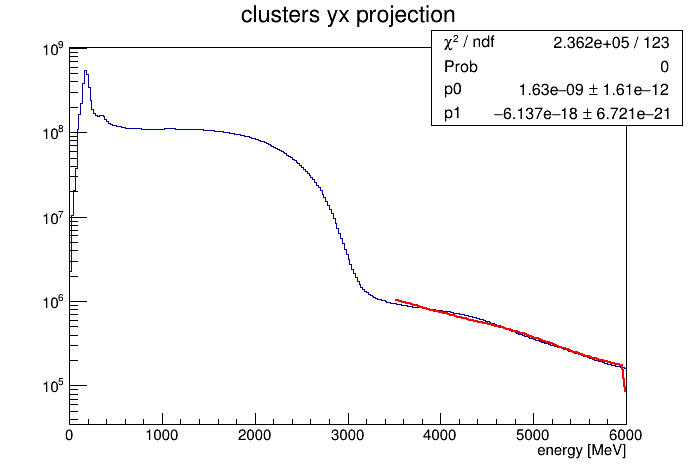

In [24]:
c = r.TCanvas()
f.Get("h_y").Draw()
c.SetLogy()
c.Draw()

In [39]:
optimumScaleFactor = 0.6264365817528298
optimumScaleFactorTriple = 2.0825799737451844

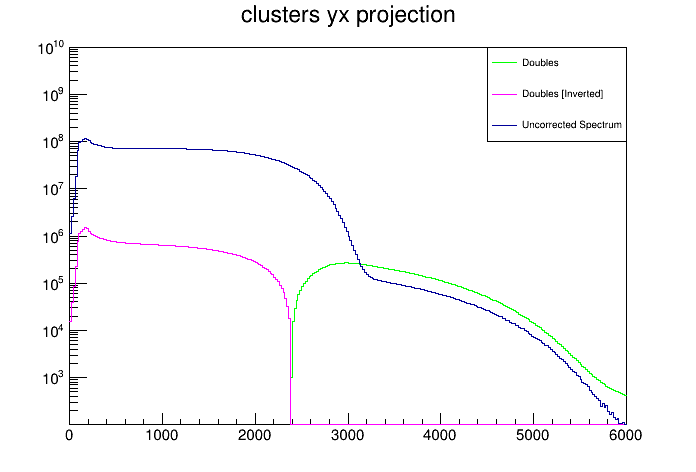

In [42]:
ding = f.Get("doublePileup").ProjectionY("",bini,-1).Clone()
print(ding)
ding.Draw("hist")
ding.Scale(doublePileupOnlyScaleFactor * optimumScaleFactor)
ding.GetYaxis().SetRangeUser(100,10000000000)
ding.SetLineColor(3)
ding.SetMarkerColor(3)


dingInv = ding.Clone()
for i in range(dingInv.GetNbinsX()+1):
    dingInv.SetBinContent(i, dingInv.GetBinContent(i)*(-1))

dingInv.SetLineColor(6)
dingInv.SetMarkerColor(6)
dingInv.Draw("hist SAME")

f.Get("h").ProjectionY("",bini,-1).Draw("hist same")

leg = r.TLegend(0.7,0.7,0.9,0.9)
leg.AddEntry(ding, "Doubles", "l")
leg.AddEntry(dingInv, "Doubles [Inverted]", "l")
leg.AddEntry(f.Get("h"), "Uncorrected Spectrum", "l")
leg.Draw()

c.Draw()

In [43]:
from pileup_correction import *

In [73]:
bini = f.Get("h").GetXaxis().FindBin(220)
print(bini, 30*6)

8848 180


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


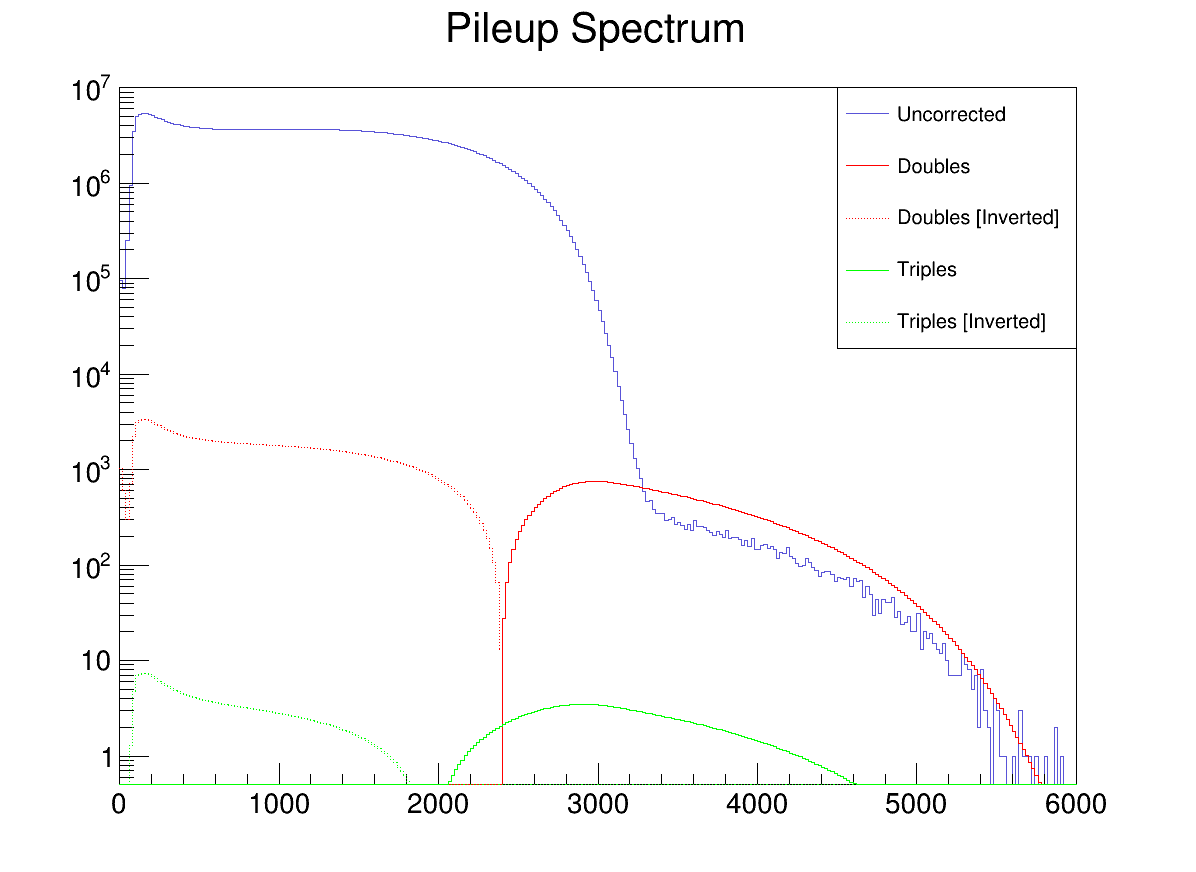

In [74]:
hi = f.Get("h").ProjectionY("",bini,-1).Clone()
triple = f.Get("triplePileup").ProjectionY("",bini,-1).Clone()
ding = f.Get("doublePileup").ProjectionY("",bini,-1).Clone()

c1 = PlotPileupSpectrum([hi, ding, triple], [1,doublePileupOnlyScaleFactor * optimumScaleFactor
                                             , initialPileupFactorTriple * optimumScaleFactorTriple],
                        ["Uncorrected", "Doubles", "Triples"],"Pileup Spectrum")

In [56]:
totalPileup = ding.Clone()
totalPileup.Add(triple,-1)

True

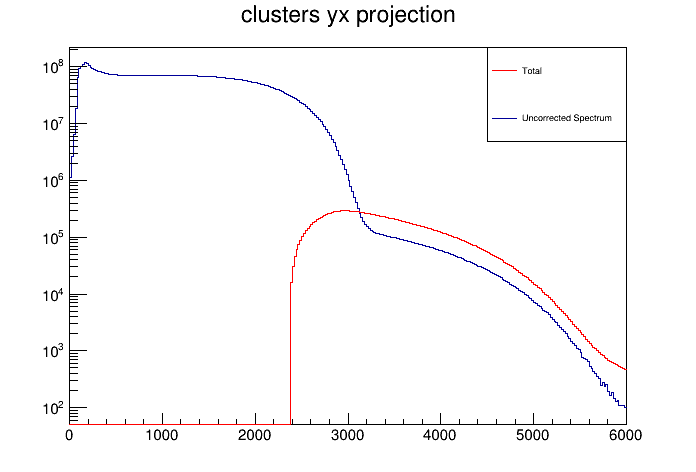

In [57]:
c = r.TCanvas()
f.Get("h").ProjectionY("",bini,-1).Draw("hist")
totalPileup.Draw("hist SAME")

leg = r.TLegend(0.7,0.7,0.9,0.9)
leg.AddEntry(totalPileup, "Total", "l")
leg.AddEntry(f.Get("h"), "Uncorrected Spectrum", "l")
leg.Draw()

c.SetLogy()

c.Draw()